<a href="https://colab.research.google.com/github/tomdaler/repository/blob/main/ML%20Projects/Techniques/Pipeline_Classification_Alg_Explore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

import pandas as pd

df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [7]:
pipeline=[]
pipeline.append(LogisticRegression(solver='liblinear'))
pipeline.append(SVC())
pipeline.append(KNeighborsClassifier())
pipeline.append(DecisionTreeClassifier())
pipeline.append(RandomForestClassifier())
pipeline.append(GaussianNB())

In [8]:
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

model_list =['Log','SVM','KNN','DT','RF','NB']
acc_list=[]
auc_list=[]
cm_list=[]

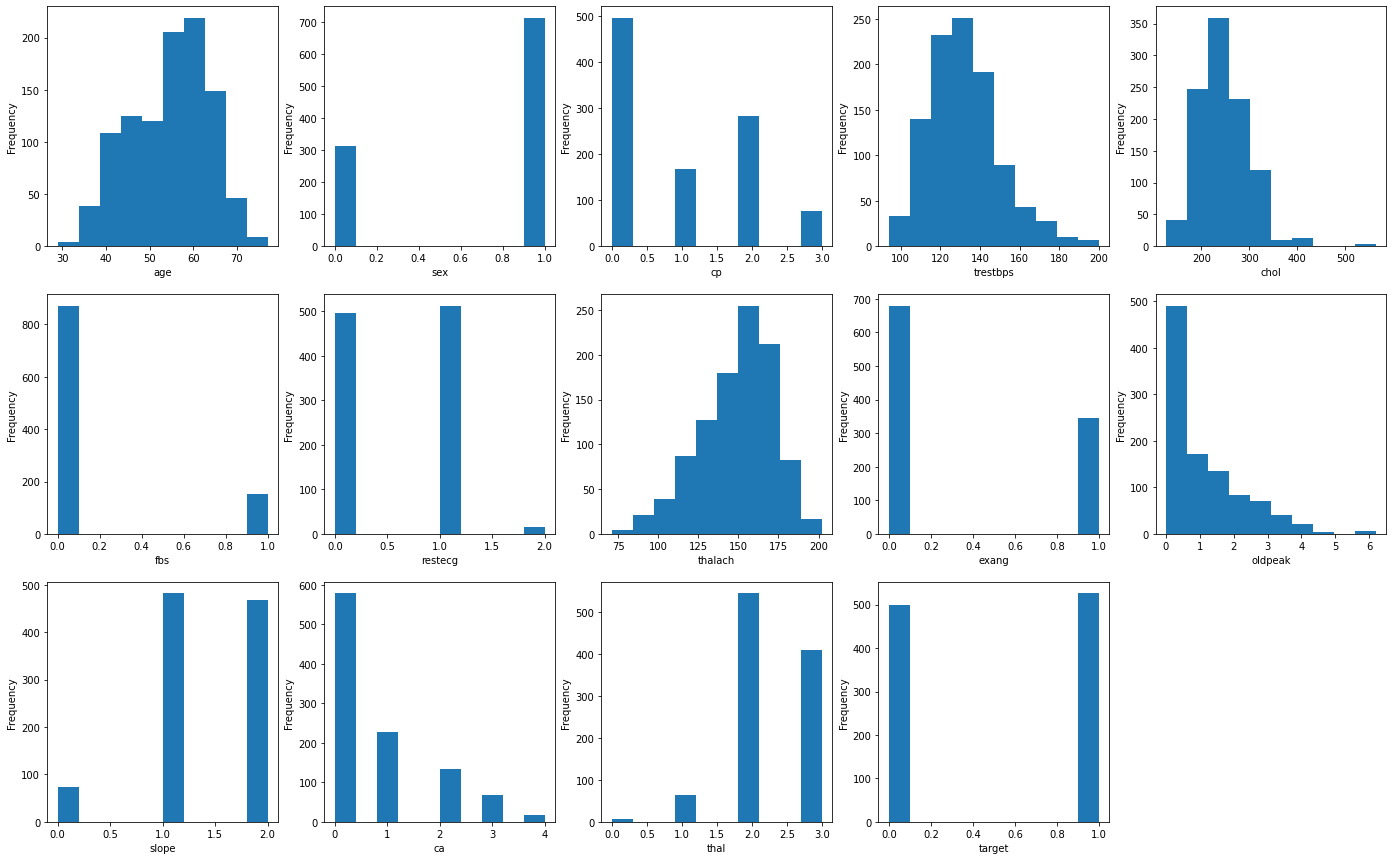

In [11]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(24,15))
i=0
for column in df:
    sub=fig.add_subplot(3,5,i+1)
    sub.set_xlabel(column)
    df[column].plot(kind='hist')
    i=i+1

Categorical Features vs. Target 

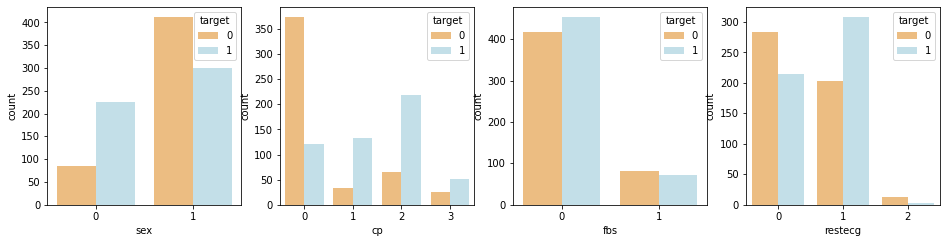

In [19]:
import seaborn as sns
cat_list=['sex','cp','fbs','restecg']
fig = plt.figure(figsize=(16,8))

for i in range(len(cat_list)):
    column=cat_list[i]
    sub = fig.add_subplot(2,4,i+1)
    chart=sns.countplot(data=df,x=column, hue='target',palette='RdYlBu')


In [12]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

X = df.drop(['target'], axis=1)
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [13]:

for model in pipeline:
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    acc_list.append(metrics.accuracy_score(y_test,y_pred))
    fpr, tpr, _thresholds = metrics.roc_curve(y_test,y_pred)
    auc_list.append(round(metrics.auc(fpr, tpr),2))
    cm_list.append(confusion_matrix(y_test, y_pred))

In [14]:
result_df = pd.DataFrame({'Model':model_list,'Accuracy':acc_list,'AUC':auc_list})
result_df

,Model,Accuracy,AUC
0,Log,0.790560,0.79
1,SVM,0.672566,0.67
2,KNN,0.705015,0.70
3,DT,0.961652,0.96
4,RF,0.982301,0.98
5,NB,0.805310,0.81


RANDOM FOREST WITH 0.98

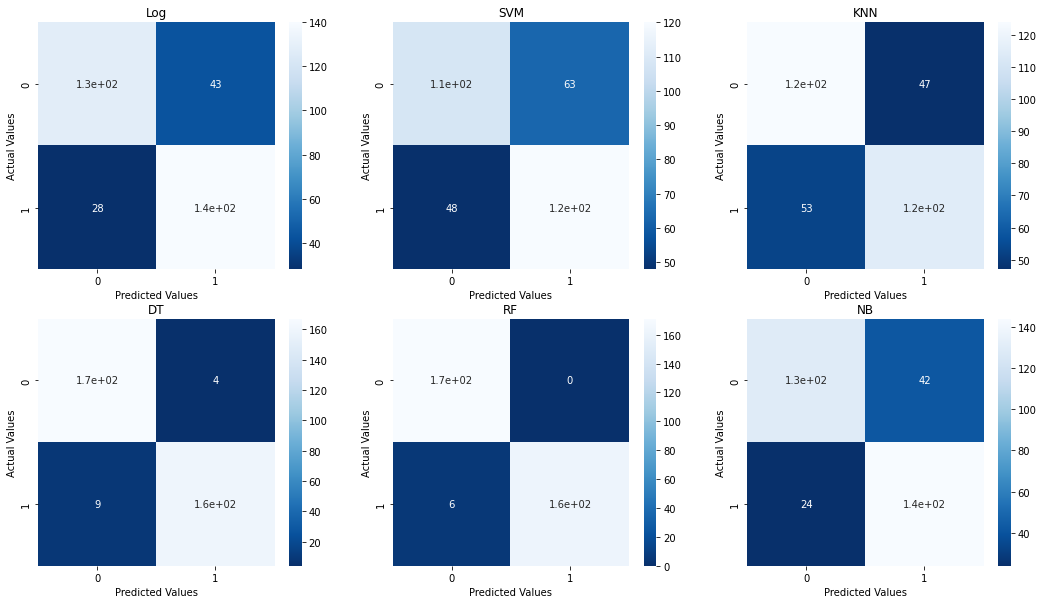

In [18]:
import seaborn as sns

fig=plt.figure(figsize=(18,10))
for i in range(len(cm_list)):
    cm=cm_list[i]
    model=model_list[i]
    sub=fig.add_subplot(2,3,i+1).set_title(model)
    cm_plot=sns.heatmap(cm,annot=True, cmap='Blues_r')
    cm_plot.set_xlabel('Predicted Values')
    cm_plot.set_ylabel('Actual Values')

